In [1]:
#Written by ChatGPT

import heapq
import math

class FibonacciHeapNode:
    def __init__(self, node, key):
        self.node = node
        self.key = key
        self.parent = None
        self.child = None
        self.left = self
        self.right = self
        self.degree = 0
        self.marked = False

class FibonacciHeap:
    def __init__(self):
        self.min_node = None
        self.nodes = {}

    def insert(self, node, key):
        new_node = FibonacciHeapNode(node, key)
        self.nodes[node] = new_node
        if not self.min_node or key < self.min_node.key:
            self.min_node = new_node

    def extract_min(self):
        if self.min_node:
            min_node = self.min_node
            if min_node.child:
                child = min_node.child
                while True:
                    next_child = child.right
                    child.left = min_node
                    child.right = min_node.right
                    min_node.right.left = child
                    min_node.right = child
                    if next_child == min_node.child:
                        break
                    child = next_child
            min_node.left.right = min_node.right
            min_node.right.left = min_node.left
            if min_node == min_node.right:
                self.min_node = None
            else:
                self.min_node = min_node.right
                self.consolidate()
            del self.nodes[min_node.node]
            return min_node.node, min_node.key
        return None, None

    def consolidate(self):
        max_degree = int(2 * (math.log(len(self.nodes)) / math.log(1 + math.sqrt(5))))
        degree_table = [None] * (max_degree + 1)
        current = self.min_node
        unprocessed_nodes = [current]
        while True:
            current = current.right
            if current == self.min_node:
                break
            unprocessed_nodes.append(current)
        for node in unprocessed_nodes:
            degree = node.degree
            while degree_table[degree]:
                other = degree_table[degree]
                if node.key > other.key:
                    node, other = other, node
                self.link(other, node)
                degree_table[degree] = None
                degree += 1
            degree_table[degree] = node
        for entry in degree_table:
            if entry and entry.key < self.min_node.key:
                self.min_node = entry

    def link(self, node1, node2):
        node1.right.left = node1.left
        node1.left.right = node1.right
        node1.parent = node2
        if not node2.child:
            node2.child = node1
            node1.right = node1
            node1.left = node1
        else:
            node1.left = node2.child
            node1.right = node2.child.right
            node2.child.right.left = node1
            node2.child.right = node1
        node2.degree += 1
        node1.marked = False

def dijkstra(graph, start):
    distances = {node: float('inf') for node in graph}
    predecessors = {node: None for node in graph}
    distances[start] = 0
    
    priority_queue = [(0, start)]
    
    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)
        
        if current_distance > distances[current_node]:
            continue
        #print(graph)
        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                predecessors[neighbor] = current_node  # Store the predecessor
                heapq.heappush(priority_queue, (distance, neighbor))
    
    return distances, predecessors

def shortest_path(graph, start, end, predecessors):
    path = []
    while end:
        path.insert(0, end)
        end = predecessors.get(end, None)
    return path

# Example usage:
graph = {
    'A': {'B': 2, 'D': 8, 'G' : 6},
    'B': {'A': 2, 'D': 5, 'E': 6},
    'C': {'E': 9, 'F': 3},
    'D': {'A': 8, 'B': 5, 'E': 3, 'F': 2},
    'E': {'B': 6, 'C': 9, 'D': 3, 'F': 1, 'G': 4},
    'F': {'D': 2, 'E': 1, 'C': 3},
    'G': {'A': 6, 'E': 4}
}

start_node = 'A'
end_node = 'F'

shortest_distance, predecessors = dijkstra(graph, start_node)
shortest_path_to_D = shortest_path(graph, start_node, end_node, predecessors)

print(f"Shortest distance from {start_node} to {end_node}: {shortest_distance}")
print(f"Shortest path from {start_node} to {end_node}: {' -> '.join(shortest_path_to_D)}")

Shortest distance from A to F: {'A': 0, 'B': 2, 'C': 12, 'D': 7, 'E': 8, 'F': 9, 'G': 6}
Shortest path from A to F: A -> B -> D -> F


In [2]:
def create_directed_graph(graph, shortest_distance):
    '''Creates a directed graph as specified on page 19 or 245 of AN19.'''
    directed = {}
    for u in graph: #first vertex
        if u not in directed:
            directed[u] = {}
        for v in graph[u]: #second vertex
            directed[u][v] = graph[u][v] - (shortest_distance[v] - shortest_distance[u])
            #directed[v][u] = graph[v][u] - (shortest_distance[u] - shortest_distance[v])
    return directed

In [3]:
d = create_directed_graph(graph, shortest_distance)

In [4]:
d

{'A': {'B': 0, 'D': 1, 'G': 0},
 'B': {'A': 4, 'D': 0, 'E': 0},
 'C': {'E': 13, 'F': 6},
 'D': {'A': 15, 'B': 10, 'E': 2, 'F': 0},
 'E': {'B': 12, 'C': 5, 'D': 4, 'F': 0, 'G': 6},
 'F': {'D': 4, 'E': 2, 'C': 0},
 'G': {'A': 12, 'E': 2}}

In [5]:
dijkstra(d, 'E')

({'A': 16, 'B': 12, 'C': 0, 'D': 4, 'E': 0, 'F': 0, 'G': 6},
 {'A': 'B', 'B': 'E', 'C': 'F', 'D': 'E', 'E': None, 'F': 'E', 'G': 'E'})

In [6]:
dijkstra(graph, 'A')

({'A': 0, 'B': 2, 'C': 12, 'D': 7, 'E': 8, 'F': 9, 'G': 6},
 {'A': None, 'B': 'A', 'C': 'F', 'D': 'B', 'E': 'B', 'F': 'D', 'G': 'A'})

In [7]:
#Test function written by ChatGPT

def is_undirected(graph):
    # Create a set to store checked edges
    checked_edges = set()

    # Iterate through each node in the graph
    for node, neighbors in graph.items():
        for neighbor, length in neighbors.items():
            # Check if the reverse edge exists and has the same length
            if (neighbor, node) in checked_edges:
                if graph[neighbor][node] != length:
                    print(f'neigbhor = {neighbor} and node = {node}')
                    return False
            else:
                checked_edges.add((node, neighbor))

    return True

In [8]:
#Test function written by ChatGPT

def is_connected(graph):
    if not graph:
        # An empty graph is considered connected
        return True

    def dfs(node, visited):
        visited[node] = True
        for neighbor in graph[node]:
            if not visited[neighbor]:
                dfs(neighbor, visited)

    # Initialize a dictionary to keep track of visited nodes
    visited = {node: False for node in graph}

    # Choose any node as the starting point
    start_node = next(iter(graph))
    dfs(start_node, visited)

    # Check if all nodes have been visited
    return all(visited[node] for node in graph)

# Example usage:
graph = {
    'A': {'B': 2, 'D': 8, 'G' : 6},
    'B': {'A': 2, 'D': 5, 'E': 6},
    'C': {'E': 9, 'F': 3},
    'D': {'A': 8, 'B': 5, 'E': 3, 'F': 2},
    'E': {'B': 6, 'C': 9, 'D': 3, 'F': 1, 'G': 4},
    'F': {'D': 2, 'E': 1, 'C': 3},
    'G': {'A': 6, 'E': 4}
}

connected = is_connected(graph)
if connected:
    print("The graph is connected.")
else:
    print("The graph is not connected.")

The graph is connected.


In [9]:
def create_petal(graph, x, t, r): 
    #assert x in graph
    #assert t in graph
    shortest_distance, predecessors = dijkstra(graph, x)
    directed = create_directed_graph(graph, shortest_distance)
    #print('directed', directed)
    
    shortest_path_to_t = shortest_path(graph, x, t, predecessors)
    if x != t and len(shortest_path_to_t) == 1:
        print(x, t, shortest_distance[t])
    

    t_dist = shortest_distance[t]
    #assert t_dist != float('inf')
    r_prime = t
    r_prime_idx = -1
    #shortest_path_rprime = []
    
    for v in shortest_path_to_t:
        #shortest_path_rprime.append(v)
        r_prime_idx += 1
        if t_dist - shortest_distance[v] < r:
            r_prime = v
            break
    shortest_path_rprime = shortest_path_to_t[r_prime_idx:]
    shortest_path_rprime = shortest_path_rprime[::-1]
    
    for i in range(len(shortest_path_rprime) - 1):
        v1 = shortest_path_rprime[i]
        v2 = shortest_path_rprime[i+1]
        directed[v1][v2] = graph[v1][v2]/2
    
    shortest_distance_directed, predecessors_directed = dijkstra(directed, t)
    petal = {}
    for v in shortest_distance_directed:
        if shortest_distance_directed[v] < r/2:
            petal[v] = {}
    # for v in shortest_path_rprime:
    #     petal[v] = {}
        
    for u in petal:
        for v in graph[u]:
            if v in petal:
                petal[u][v] = graph[u][v]

    # if not is_connected(petal):
    #     print(petal)
    #     raise ValueError(f'Petal = {petal} not connected')
    if len(petal) == 1:
        r_prime = list(petal.keys())[0]

    return petal, r_prime, shortest_path_to_t 

In [10]:
create_petal(graph, 'A', 'C', 12 - 5*12/8)

({'C': {'F': 3}, 'F': {'C': 3}}, 'F', ['A', 'B', 'D', 'F', 'C'])

In [11]:
graph

{'A': {'B': 2, 'D': 8, 'G': 6},
 'B': {'A': 2, 'D': 5, 'E': 6},
 'C': {'E': 9, 'F': 3},
 'D': {'A': 8, 'B': 5, 'E': 3, 'F': 2},
 'E': {'B': 6, 'C': 9, 'D': 3, 'F': 1, 'G': 4},
 'F': {'D': 2, 'E': 1, 'C': 3},
 'G': {'A': 6, 'E': 4}}

In [12]:
#Written by ChatGPT

def maintain_graph_difference(G, H):
    result = {}

    for u, neighbors in G.items():
        if u not in H:
            result[u] = {}
        
        for v in neighbors:
            if u not in H and v not in H:
                if u not in result:
                    result[u] = {}
                result[u][v] = G[u][v]

    return result

In [13]:
graph

{'A': {'B': 2, 'D': 8, 'G': 6},
 'B': {'A': 2, 'D': 5, 'E': 6},
 'C': {'E': 9, 'F': 3},
 'D': {'A': 8, 'B': 5, 'E': 3, 'F': 2},
 'E': {'B': 6, 'C': 9, 'D': 3, 'F': 1, 'G': 4},
 'F': {'D': 2, 'E': 1, 'C': 3},
 'G': {'A': 6, 'E': 4}}

In [14]:
maintain_graph_difference(graph, ['A', 'B'])

{'C': {'E': 9, 'F': 3},
 'D': {'E': 3, 'F': 2},
 'E': {'C': 9, 'D': 3, 'F': 1, 'G': 4},
 'F': {'D': 2, 'E': 1, 'C': 3},
 'G': {'E': 4}}

In [15]:
def petal_decomposition(graph, x, t):
    assert x in graph
    if t not in graph:
        raise ValueError(f't = {t} not in graph vertices = {list(graph.keys())}')
    shortest_distance, predecessors = dijkstra(graph, x)
    r = max(shortest_distance.values())
    #print(r)
    Ys = [graph]
    Xs = []
    ys = []
    xs = [x]
    ts = []
    j = 1
    if shortest_distance[t] > 5*r/8:
        
        X_1, x_1, path = create_petal(graph, x, t, shortest_distance[t] - 5*r/8)
        #print('special petal', X_1, x_1, t, path)
        Ys.append(maintain_graph_difference(Ys[0], X_1))
        Xs.append(X_1)
        xs.append(x_1)
        
        y1 = x
        min_distance = r

        for i in range(len(path)):
            if path[i] == x_1:
                y1 = path[i-1]
                break

        j = 2
        ts = [y1, t]
        ys = [y1]
        #if y1 in X_1 and x_1 != t:
        #    raise ValueError(f'y1 = {y1} should not be in X1 = {X_1}')
        
    else:
        ts = [t] 
    while True:
        #shortest_distance, predecessors = dijkstra(Ys[-1], x)
        ball = {key : value for key, value in shortest_distance.items() if shortest_distance[key] < 3*r/4}
        leftover = [v for v in Ys[-1] if v not in ball and shortest_distance[v] != float('inf')]
        if len(leftover) == 0:
            break
        else:
            ts.append(leftover[0])
            #assert x in Ys[-1]
            #assert ts[-1] in Ys[-1]
            X_j, x_j, path = create_petal(Ys[-1], x, ts[-1], r/8)
            #assert x_j in Ys[-1]
            if len(path) == 1:
                print('path of length 1:', x, x_j, ts[-1])
            #if x_j not in X_j: #Cluster center must always be in cluster
            #    raise ValueError('x_j not in X_j')
            #assert ts[-1] in X_j
            Xs.append(X_j)
            xs.append(x_j)
            Ys.append(maintain_graph_difference(Ys[-1], X_j))
            xj_idx = -1
            #if x_j not in path:
            #    print(f'x_j {x_j} not found in path {path} of length {shortest_distance[ts[-1]]} from {x} to {ts[-1]}')
            for i in range(len(path)):
                if path[i] == x_j:
                    xj_idx = i
                if xj_idx > -1 and i < len(path) - 1:
                    X_j[path[i]][path[i+1]] /= 2
                    X_j[path[i+1]][path[i]] /= 2
            if x_j == x:
                ys.append(path[0])
            else:
                ys.append(path[xj_idx - 1])
            j += 1
            if ys[-1] == xs[-1]:
                print('x = y', path)
                raise ValueError('x = y')
            #if ys[-1] not in graph[xs[-1]]:
            #    raise ValueError(f'{xs[-1]}, {ys[-1]} not an edge in graph')

    s = j - 1
    X0 = Ys[s]

    Xs = [X0] + Xs
    return Xs, ys, xs, ts
        

In [16]:
#Helper function no longer being used

def make_undirected(graph):
    undirected_graph = {}
    for u in graph:
        for v, length in graph[u].items():
            # Add edge from u to v
            if u not in undirected_graph:
                undirected_graph[u] = {}
            undirected_graph[u][v] = length
            
            # Add edge from v to u
            if v not in undirected_graph:
                undirected_graph[v] = {}
            undirected_graph[v][u] = length
    
    return undirected_graph

In [17]:
#Test function written by ChatGPT

def is_tree(graph):
    num_vertices = len(graph)
    num_edges = sum(len(adj_list) for adj_list in graph.values()) // 2  # Divide by 2 to account for double-counting edges

    return num_edges == num_vertices - 1

# Example usage

if is_tree(graph):
    print("The graph is a tree.")
else:
    print("The graph is not a tree.")


The graph is not a tree.


In [18]:
def hierarchical_petal_decomposition(graph, x_0, t):
    
    if len(graph) == 1:
        return graph
    # if is_tree(graph):
    #     return graph
    Xs, ys, xs, ts = petal_decomposition(graph, x_0, t)

    Ts = []
    for j in range(len(Xs)):
        # if xs[j] not in Xs[j]:
        #     print(f'xj = {xs[j]} not in {Xs[j]}')
        # if ts[j] not in Xs[j]:
        #     print(f'tj = {xs[j]} not in {Xs[j]}')
        Ts.append(hierarchical_petal_decomposition(Xs[j], xs[j], ts[j]))

    T = {}
    for tree in Ts:
        # if not is_undirected(tree):
        #     print(tree)
        #     raise ValueError('tree is not undirected')
        for u in tree:
            T[u] = tree[u]
    #print(xs, ys)
    if len(xs) > 1:
        for i in range(1, len(xs)):
            x = xs[i]
            y = ys[i-1]
            T[x][y] = graph[x][y]
            #T[y] = {x : graph[y][x]}
            T[y][x] = graph[y][x]
    
    return T
        

In [19]:
tree = hierarchical_petal_decomposition(graph, 'A', 'A')

In [20]:
tree

{'A': {'B': 2, 'G': 6},
 'B': {'A': 2, 'D': 5, 'E': 6},
 'D': {'B': 5, 'F': 2},
 'E': {'B': 6},
 'G': {'A': 6},
 'C': {'F': 3},
 'F': {'C': 3, 'D': 2}}

### Tree

In [21]:
import numpy as np
from tqdm import tqdm
import time
def calculate_stretch(graph, x_0, t):
    '''Calculates the ratio of the stretch of an LSST to m log(n) log log(n) '''
    start = time.time()
    T = hierarchical_petal_decomposition(graph, x_0, t)
    end = time.time()
    duration = end - start
    assert is_undirected(T)
    assert is_tree(T)
    #T = make_undirected(T)
    #print(T)
    if len(T) != len(graph):
        print(T)
        raise ValueError(f'Not a spanning tree. T has {len(T)} vertices while the original graph has {len(graph)} vertices')
    n = len(graph)
    m = 0
    stretch = 0
    graph_keys_list = list(graph.keys())
    for i in tqdm(range(len(graph_keys_list))):
        u = graph_keys_list[i]
        for v in graph[u]:
            assert u in T and v in T
            m += 1
            distances, _ = dijkstra(T, u)
            if distances[v] == float('inf'):
                print('INF', u, v, T)
                print(is_undirected(T))
                print(is_connected(T))
                raise ValueError('Distance should be finite')
            stretch += distances[v]/graph[u][v]
    # print(f'fraction of edges: {(n/2)/(m*(m-1)/2) }')
    m /= 2
    bound = m * np.log(n) * np.log(np.log(n))
    #print(f'n = {n}')
    return stretch, duration, bound

In [22]:
import random

def generate_graph(m, p):
    if m <= 1:
        # Special case: a single vertex graph is always connected.
        return {'0': {}}

    # Create a list of vertices as strings from '0' to 'm-1'.
    vertices = [str(i) for i in range(m)]

    # Create a dictionary to represent the graph with edge lengths.
    graph = {v: {} for v in vertices}

    # Create a list of edges with associated probabilities.
    edges = []

    for i in range(m):
        for j in range(i + 1, m):
            if random.random() < p:
                edges.append((vertices[i], vertices[j]))

    # Create a minimum spanning tree using Prim's algorithm.
    random.shuffle(vertices)
    visited = set([vertices[0]])
    while len(visited) < m:
        current_vertex = random.choice(list(visited))
        remaining_vertices = [v for v in vertices if v not in visited]
        if not remaining_vertices:
            break
        next_vertex = random.choice(remaining_vertices)
        visited.add(next_vertex)
        edge = (current_vertex, next_vertex)
        edges.append(edge)

    # Shuffle the list of edges to randomize the order.
    random.shuffle(edges)

    # Add the edges to the graph.
    for (start_vertex, end_vertex) in edges:
        edge_length = float(random.randint(1.0, 1000.0))  # Modify this range as needed
        graph[start_vertex][end_vertex] = edge_length
        graph[end_vertex][start_vertex] = edge_length

    return graph

# # Example usage:
# m = 5
# p = 0.5  # Probability of an edge between any pair of vertices
# connected_graph = generate_connected_graph_with_probability(m, p)
# print(connected_graph)

In [23]:
def furthest_point(graph, x_0):
    distances, _ = dijkstra(graph, x_0)
    #print(distances)
    max_dist = max(distances.values())
    for v in distances:
        if distances[v] == max_dist:
            return v

In [24]:
import random

# Create a graph represented as a dictionary

def test_lsst(m, p):

    graph = generate_graph(m, p)
    assert is_connected(graph)
            
    v1 = str(np.random.randint(0, m))
    
    #print(graph, v1)
    return calculate_stretch(graph, v1, v1)

# Example: Accessing the length of the edge between vertex '0' and '1'
#edge_length_01 = graph['0']['1']

### Check if LSST algorithm is near linear

In [27]:
import time
n = 10
times = []
ratios = []
bounds = []

vs = range(100, 2500, 100)

for num_vertices in vs:
    avg_time = 0
    avg_stretch = 0
    avg_bound = 0
    for i in range(n):
        #print(f'Starting trial {i + 1} of {n}')
        p = np.log(num_vertices)/num_vertices

        stretch, duration, bound = test_lsst(num_vertices, p)
        avg_time += duration
        avg_stretch += stretch
        avg_bound += bound
        #print(f'Found LSST with ratio {ratio} in {duration} seconds')
    times.append(avg_time/n)
    ratios.append(avg_stretch/n)
    bounds.append(avg_bound)
    print(f'Done with {num_vertices} vertices')
        
        #print(test_lsst(num_vertices, 0.1))#np.log(1000)/1000))
            
            
        #print(f'LSST on graph with {num_vertices} vertices')
        # start = time.time()
        # print(test_lsst(num_vertices, 1))
        # end = time.time()
        #print(f'Took {end - start} seconds')

100%|██████████| 100/100 [00:00<00:00, 2002.11it/s]


Done with 100 vertices


100%|██████████| 200/200 [00:00<00:00, 792.82it/s]


Done with 200 vertices


100%|██████████| 300/300 [00:00<00:00, 491.73it/s]


Done with 300 vertices


100%|██████████| 400/400 [00:02<00:00, 151.81it/s]


Done with 400 vertices


100%|██████████| 500/500 [00:01<00:00, 278.51it/s]


Done with 500 vertices


100%|██████████| 600/600 [00:02<00:00, 223.52it/s]


Done with 600 vertices


100%|██████████| 700/700 [00:03<00:00, 179.73it/s]


Done with 700 vertices


100%|██████████| 800/800 [00:05<00:00, 148.99it/s]


Done with 800 vertices


100%|██████████| 900/900 [00:06<00:00, 136.28it/s]


Done with 900 vertices


100%|██████████| 1000/1000 [00:08<00:00, 117.27it/s]


Done with 1000 vertices


100%|██████████| 1100/1100 [00:10<00:00, 104.47it/s]


Done with 1100 vertices


100%|██████████| 1200/1200 [00:12<00:00, 98.50it/s] 


Done with 1200 vertices


100%|██████████| 1300/1300 [00:15<00:00, 84.78it/s]


Done with 1300 vertices


100%|██████████| 1400/1400 [00:18<00:00, 77.49it/s]


Done with 1400 vertices


100%|██████████| 1500/1500 [00:21<00:00, 70.54it/s]


Done with 1500 vertices


100%|██████████| 1600/1600 [00:24<00:00, 64.85it/s]


Done with 1600 vertices


100%|██████████| 1700/1700 [00:28<00:00, 60.34it/s]


Done with 1700 vertices


100%|██████████| 1800/1800 [00:31<00:00, 58.06it/s]


Done with 1800 vertices


100%|██████████| 1900/1900 [00:34<00:00, 55.60it/s]


Done with 1900 vertices


100%|██████████| 2000/2000 [00:38<00:00, 51.76it/s]


Done with 2000 vertices


100%|██████████| 2100/2100 [00:45<00:00, 45.66it/s]


Done with 2100 vertices


100%|██████████| 2200/2200 [00:51<00:00, 42.73it/s]


Done with 2200 vertices


100%|██████████| 2300/2300 [00:55<00:00, 41.26it/s]


Done with 2300 vertices


100%|██████████| 2400/2400 [01:01<00:00, 39.14it/s]

Done with 2400 vertices


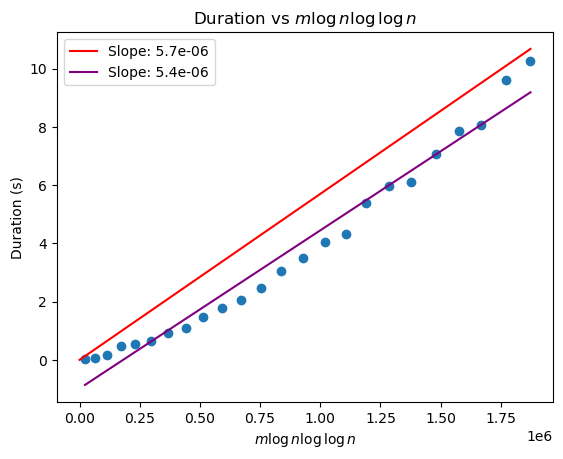

In [44]:
import matplotlib.pyplot as plt
slope = 5.7e-6
best_fit_slope, _ = np.polyfit(bounds, times, 1)
plt.scatter(bounds, times)
plt.plot([0, bounds[-1]], [0, slope * bounds[-1]], color='red', linestyle='-', label=f'Slope: {slope}')
plt.plot(bounds, np.poly1d(np.polyfit(bounds, times, 1))(bounds), color = 'purple', label = f'Slope: {round(best_fit_slope, 7)}')
plt.title(rf'Duration vs $m\log n \log \log n$') 
plt.ylabel('Duration (s)')
plt.xlabel(r'$m\log n \log \log n$')
plt.legend()
plt.show()

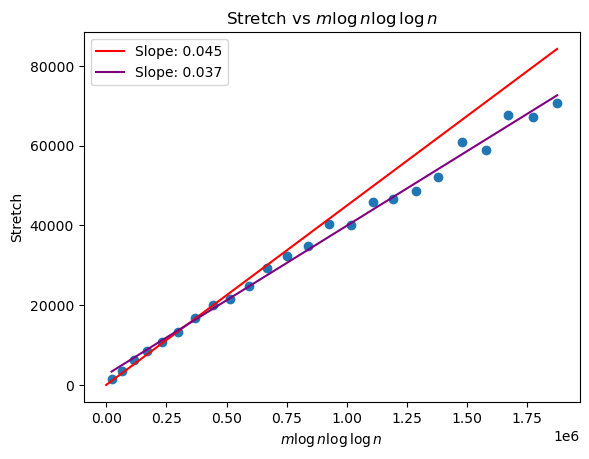

In [46]:
import matplotlib.pyplot as plt
slope = 0.045
best_fit_slope, _ = np.polyfit(bounds, ratios, 1)
plt.scatter(bounds, ratios)
plt.plot([0, bounds[-1]], [0, slope * bounds[-1]], color='red', linestyle='-', label=f'Slope: {slope}')
plt.plot(bounds, np.poly1d(np.polyfit(bounds, ratios, 1))(bounds), color = 'purple', label = f'Slope: {round(best_fit_slope, 3)}')
plt.title(rf'Stretch vs $m\log n \log \log n$') 
plt.ylabel('Stretch')
plt.xlabel(r'$m\log n \log \log n$')
plt.legend()
plt.show()

In [ ]:
ratios

In [ ]:
times

In [ ]:
bounds